# Stock prices dataset
The data is of stock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [1]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [2]:
#Enable graph plotting in Jupyter
%matplotlib inline

# Numerical libraries
import numpy as np  

# to handle data in form of rows and columns 
import pandas as pd    

import seaborn as sns
sns.set(color_codes=True)
sns.set_style("whitegrid")

In [10]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [45]:
# run this cell to upload file using GUI if you are using google colab
project_path='/content/drive/MyDrive/ColabNotebooks/'
data=pd.read_csv(project_path+'prices.csv',engine='python',sep=',')
data.shape


(851264, 7)

In [27]:
data.head(10)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [15]:
DT=data.dtypes.to_frame(name='Datatypes')
DT.reset_index(level=None, drop=False, inplace=True)
DT.rename(columns ={'index':'Columns'},inplace=True)
DT

,Columns,Datatypes
0,date,object
1,symbol,object
2,open,float64
3,close,float64
4,low,float64
5,high,float64
6,volume,float64


## Question 2

### Drop null
- Drop null values if any

In [16]:
for col in data.columns:
    print(col,sum(data[col].isna()))

date 0
symbol 0
open 0
close 0
low 0
high 0
volume 0


### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [46]:
data.drop(['date','volume','symbol'], axis=1,inplace=True)

## Question 3

### Print the dataframe
- print the modified dataframe

In [47]:
data.head(10)

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002
5,115.510002,115.550003,114.500000,116.059998
6,116.459999,112.849998,112.589996,117.070000
7,113.510002,114.379997,110.050003,115.029999
8,113.330002,112.529999,111.919998,114.879997
9,113.660004,110.379997,109.870003,115.870003


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [48]:
y=data.pop('close').to_frame(name='close')

In [49]:
X=data

In [50]:
print(X.shape,y.shape)

(851264, 3) (851264, 1)


## Question 4

### Create train and test sets
- Split the data into training and testing

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [52]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [53]:
X_train_std = np.asarray(X_train_std)
X_test_std = np.asarray(X_test_std)

y_train= np.array(y_train)
y_test= np.array(y_test)

In [54]:
X_train_std=X_train_std.reshape(X_train_std.shape[0],X_train_std.shape[1],1)
X_test_std=X_test_std.reshape(X_test_std.shape[0],X_test_std.shape[1],1)

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model=Sequential([Flatten(),Dense(1, activation='linear')])

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [56]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [57]:
model.fit(X_train_std, y_train, epochs=50, batch_size=128 , validation_data=(X_test_std,y_test)) #batch_size/epoch = no of iterations

Epoch 1/50
4656/4656 [==============================] - 5s 1ms/step - loss: 41.3080 - val_loss: 0.9972
Epoch 2/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9492 - val_loss: 0.9965
Epoch 3/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9442 - val_loss: 0.9877
Epoch 4/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9364 - val_loss: 0.9759
Epoch 5/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9309 - val_loss: 0.9696
Epoch 6/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9242 - val_loss: 0.9960
Epoch 7/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9193 - val_loss: 0.9559
Epoch 8/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9127 - val_loss: 0.9579
Epoch 9/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9063 - val_loss: 0.9553
Epoch 10/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.89

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [58]:
model.evaluate(X_test_std,y_test)

7981/7981 [==============================] - 5s 687us/step - loss: 0.7386


0.7386330962181091

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [59]:
model.predict(sc.transform([[123.430000, 122.30999, 116.250000]]))

array([[119.77532]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [92]:
import tensorflow as tf
(trainX, trainy), (testX, testy) = tf.keras.datasets.fashion_mnist.load_data()

In [93]:
u, indices = np.unique(trainy, return_inverse=True)
u #there are 10 categories in which the Apparels are grouped into

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [94]:
# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


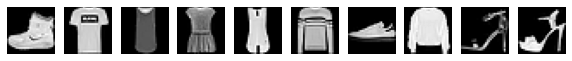

label for each of the above image: [9 0 0 3 0 2 7 2 5 5]


In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(trainX[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (trainy[0:10]))

### Change train and test labels into one-hot vectors

In [96]:
trainy = tf.keras.utils.to_categorical(trainy,num_classes=10) 
testy =  tf.keras.utils.to_categorical(testy,num_classes=10) 

In [97]:
trainy[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Build the Graph

### Initialize model, reshape & normalize data

In [98]:
model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Reshape((784,), input_shape =(28,28,)))
model1.add(tf.keras.layers.BatchNormalization()) 

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [99]:
model1.add(tf.keras.layers.Dense(200, activation ='relu'))
model1.add(tf.keras.layers.Dense(100, activation ='relu'))
model1.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [100]:
model1.add(tf.keras.layers.Dense(10, activation ='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
model1.fit(trainX,trainy, validation_data=(testX, testy), epochs=15, batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5092 - accuracy: 0.8184 - val_loss: 0.4102 - val_accuracy: 0.8520
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4000 - accuracy: 0.8542 - val_loss: 0.3643 - val_accuracy: 0.8649
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3645 - accuracy: 0.8658 - val_loss: 0.3614 - val_accuracy: 0.8679
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3365 - accuracy: 0.8752 - val_loss: 0.3630 - val_accuracy: 0.8717
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3165 - accuracy: 0.8828 - val_loss: 0.3727 - val_accuracy: 0.8709
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3006 - accuracy: 0.8883 - val_loss: 0.3530 - val_accuracy: 0.8755
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2881 - accuracy: 0.8925 - val_loss: 0.3354 - val_accuracy:

In [101]:
model1.evaluate(testX,testy, verbose=0)

[0.3707791864871979, 0.8877999782562256]